In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv(r"C:\Users\Khalil.hasanov\Desktop\my theis\churn30 thesis sample.csv")

In [26]:
df["churn30"].value_counts()

churn30
0    7237
1    2763
Name: count, dtype: int64

In [11]:
amount_columns = df.filter(like='amount')

# Describe the filtered columns
description = amount_columns.describe()

print(description)

       amount_30_W2W_in  amount_30_W2W_out  amount_30_C2W  amount_30_W2C  \
count      1.000000e+04       1.000000e+04   10000.000000    10000.00000   
mean       9.453510e+02       9.678376e+02     741.957900      767.43010   
std        2.086832e+04       2.049811e+04    3584.158881     4628.45506   
min        0.000000e+00       0.000000e+00       0.000000        0.00000   
25%        0.000000e+00       0.000000e+00       0.000000        0.00000   
50%        0.000000e+00       0.000000e+00      40.500000       12.00000   
75%        1.000000e+01       1.200000e+01     334.000000      270.00000   
max        1.456504e+06       1.402602e+06  131659.000000   253353.00000   

       amount_30_COA  amount_30_CIT  amount_30_Bills  amount_30_Bravo  \
count   10000.000000   10000.000000     10000.000000     10000.000000   
mean      306.505700     485.306100       118.468200         5.018800   
std      4178.409087    4291.542174       503.261616        54.581702   
min         0.000000   

In [12]:
# Filter columns based on specified column names
filtered_columns = df[['bonus_segment', 'source_group', 'tenure_range', 'app_removed']]

# Describe categorical columns
categorical_summary = filtered_columns.describe(include=['object'])

print(categorical_summary)

       bonus_segment source_group tenure_range
count          10000        10000        10000
unique             5           11            6
top         no_bonus   Google Ads      270day+
freq            8120         3881         6404


In [13]:
grouped_counts_bonus = df.groupby('bonus_segment')['churn30'].value_counts()

# Displaying the grouped counts
print(grouped_counts_bonus)

bonus_segment             churn30
Million_bonus             0          1185
                          1           547
Retention_bonus2          0            17
Welcome+Retention2_bonus  0            14
                          1            12
Welcome_bonus             0            73
                          1            32
no_bonus                  0          5948
                          1          2172
Name: count, dtype: int64


In [14]:
grouped_counts_source = df.groupby('source_group')['churn30'].value_counts()

# Displaying the grouped counts
print(grouped_counts_source)

source_group      churn30
Apple Search Ads  0           539
                  1           149
Facebook Ads      0           180
                  1            56
Google Ads        0          2765
                  1          1116
Influencers       0             5
MilliON           0            77
                  1            25
Organic           0          2780
                  1          1092
Others            0           683
                  1           268
QR_code           0            21
                  1            11
Referral          0             2
SMS               0            28
                  1            13
landing_page      0           157
                  1            33
Name: count, dtype: int64


In [15]:
grouped_counts_tenure = df.groupby('tenure_range')['churn30'].value_counts()

# Displaying the grouped counts
print(grouped_counts_tenure)

tenure_range  churn30
120-180day    0           563
              1           189
180-270day    0          1030
              1           369
270day+       0          4738
              1          1666
31-60day      1           129
              0            54
60-90day      0           473
              1           229
90-120day     0           379
              1           181
Name: count, dtype: int64


In [16]:
df_bonus_segment = pd.get_dummies(df["bonus_segment"])

df_bonus_segment= df_bonus_segment.replace({False: 0,True: 1})
df_bonus_segment.head()

,Million_bonus,Retention_bonus2,Welcome+Retention2_bonus,Welcome_bonus,no_bonus
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0


In [17]:
df_source_group = pd.get_dummies(df["source_group"])

df_source_group= df_source_group.replace({False: 0,True: 1})
df_source_group.head()

,Apple Search Ads,Facebook Ads,Google Ads,Influencers,MilliON,Organic,Others,QR_code,Referral,SMS,landing_page
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [18]:
df_tenure_range = pd.get_dummies(df["tenure_range"])

df_tenure_range= df_tenure_range.replace({False: 0,True: 1})
df_tenure_range.head()

,120-180day,180-270day,270day+,31-60day,60-90day,90-120day
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [19]:
df_app_churn=df[["app_removed","churn30"]]
df_app_churn.head()

,app_removed,churn30
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [46]:
# Assuming df is your dataframe
columns_to_removeofsmo = ["bonus_segment", "source_group", "tenure_range"]
df_smoote = df.drop(columns=columns_to_removeofsmo)

combined_df_smoote = pd.concat([df_bonus_segment, df_source_group, df_tenure_range, df_smoote], axis=1)

# Separate features and target variable
X = combined_df_smoote.drop('churn30', axis=1)
y = combined_df_smoote['churn30']

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['churn30'])], axis=1)

print("Original class distribution:")
print(y.value_counts())

print("\nResampled class distribution after SMOTE:")
print(y_resampled.value_counts())

print("\nResampled DataFrame:")
print(df_resampled)

Original class distribution:
churn30
0    7237
1    2763
Name: count, dtype: int64

Resampled class distribution after SMOTE:
churn30
0    7237
1    7237
Name: count, dtype: int64

Resampled DataFrame:
       Million_bonus  Retention_bonus2  Welcome+Retention2_bonus  \
0                  0                 0                         0   
1                  0                 0                         0   
2                  0                 0                         0   
3                  1                 0                         0   
4                  1                 0                         0   
...              ...               ...                       ...   
14469              0                 0                         0   
14470              0                 0                         0   
14471              0                 0                         0   
14472              0                 0                         0   
14473              0                 0            

In [54]:
# Assuming df is your dataframe
columns_to_remove = ["bonus_segment", "source_group", "tenure_range", "churn30", "app_removed"]
df_prepare_scale = df.drop(columns=columns_to_remove)

# Scale the data
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_prepare_scale)

# Create a DataFrame with scaled values and original column names
df_scaled = pd.DataFrame(df_scaled_values, columns=df_prepare_scale.columns)
df_scaled.head()




,Million_bonus,Retention_bonus2,Welcome+Retention2_bonus,Welcome_bonus,no_bonus,Apple Search Ads,Facebook Ads,Google Ads,Influencers,MilliON,...,amount_180_PB,tr_count_180_PB,amount_180_EntrPay,tr_count_180_EntrPay,amount_180_IN,tr_count_180_IN,amount_180_OUT,tr_count_180_OUT,amount_180_QR,tr_count_180_QR
0,-0.404820,-0.034291,-0.042421,-0.085892,0.556229,-0.226616,-0.129022,1.435736,-0.018589,-0.084244,...,0.929705,0.610575,-0.022821,-0.030407,-0.059525,-0.006852,-0.056834,0.004874,0.325067,0.551818
1,-0.404820,-0.034291,-0.042421,-0.085892,0.556229,-0.226616,-0.129022,-0.696507,-0.018589,-0.084244,...,-0.098723,-0.127541,-0.022821,-0.030407,-0.072987,-0.017995,-0.069267,0.131010,-0.079213,-0.150955
2,-0.404820,-0.034291,-0.042421,-0.085892,0.556229,-0.226616,-0.129022,1.435736,-0.018589,-0.084244,...,-0.098723,-0.127541,-0.022821,-0.030407,-0.079482,-0.118283,-0.075789,-0.205351,-0.079213,-0.150955
3,2.470235,-0.034291,-0.042421,-0.085892,-1.797822,-0.226616,-0.129022,-0.696507,-0.018589,-0.084244,...,-0.098723,-0.127541,-0.022821,-0.030407,-0.078791,-0.107140,-0.075761,-0.184329,-0.079213,-0.150955
4,2.470235,-0.034291,-0.042421,-0.085892,-1.797822,-0.226616,-0.129022,-0.696507,-0.018589,-0.084244,...,-0.098723,-0.127541,-0.022821,-0.030407,-0.073705,-0.051424,-0.073652,-0.184329,-0.079213,-0.150955


In [44]:
combined_df = pd.concat([df_bonus_segment, df_source_group, df_tenure_range, df_scaled, df_app_churn], axis=1)

# Print the combined DataFrame
print(combined_df.head())

   Million_bonus  Retention_bonus2  Welcome+Retention2_bonus  Welcome_bonus  \
0              0                 0                         0              0   
1              0                 0                         0              0   
2              0                 0                         0              0   
3              1                 0                         0              0   
4              1                 0                         0              0   

   no_bonus  Apple Search Ads  Facebook Ads  Google Ads  Influencers  MilliON  \
0         1                 0             0           1            0        0   
1         1                 0             0           0            0        0   
2         1                 0             0           1            0        0   
3         0                 0             0           0            0        0   
4         0                 0             0           0            0        0   

   ...  amount_180_EntrPay  tr_count_1

In [45]:
combined_df.corr()

,Million_bonus,Retention_bonus2,Welcome+Retention2_bonus,Welcome_bonus,no_bonus,Apple Search Ads,Facebook Ads,Google Ads,Influencers,MilliON,...,amount_180_EntrPay,tr_count_180_EntrPay,amount_180_IN,tr_count_180_IN,amount_180_OUT,tr_count_180_OUT,amount_180_QR,tr_count_180_QR,app_removed,churn30
Million_bonus,1.000000,-0.018887,-0.023368,-0.047148,-0.951202,-0.047150,-0.048526,-0.014744,0.001584,0.008767,...,0.000015,-0.001480,-0.028922,-0.016967,-0.028494,-0.029774,-0.022033,-0.020396,0.030622,0.040450
Retention_bonus2,-0.018887,1.000000,-0.002107,-0.004251,-0.085762,0.017554,-0.006416,-0.002977,-0.000923,-0.004189,...,-0.001121,-0.001510,-0.001713,0.008935,-0.001794,0.018522,-0.001089,0.000328,-0.005426,-0.025498
Welcome+Retention2_bonus,-0.023368,-0.002107,1.000000,-0.005259,-0.106109,0.001639,-0.007938,-0.004395,-0.001142,-0.005183,...,-0.001387,-0.001868,-0.003985,-0.001031,-0.003820,-0.000807,-0.004411,-0.008526,0.009612,0.021150
Welcome_bonus,-0.047148,-0.004251,-0.005259,1.000000,-0.214085,0.003008,-0.009552,0.004529,-0.002304,-0.000693,...,-0.002798,-0.003769,0.006847,-0.000284,0.007165,0.001387,-0.004306,-0.002322,-0.004224,0.006557
no_bonus,-0.951202,-0.085762,-0.106109,-0.214085,1.000000,0.042817,0.051202,0.013985,-0.000687,-0.007193,...,0.001014,0.002819,0.026926,0.015699,0.026415,0.026627,0.023152,0.021436,-0.029237,-0.040956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tr_count_180_OUT,-0.029774,0.018522,-0.000807,0.001387,0.026627,0.066788,-0.013903,-0.012577,0.001489,-0.010221,...,-0.002067,0.001298,0.421087,0.318838,0.420073,1.000000,0.106189,0.089470,0.010683,-0.086979
amount_180_QR,-0.022033,-0.001089,-0.004411,-0.004306,0.023152,0.026629,-0.000301,-0.042105,0.000447,-0.006757,...,0.031558,0.036232,0.143218,0.048899,0.139915,0.106189,1.000000,0.367693,0.016386,-0.036730
tr_count_180_QR,-0.020396,0.000328,-0.008526,-0.002322,0.021436,0.023463,0.001271,-0.043036,0.002917,-0.010144,...,0.042244,0.053454,0.042944,0.052014,0.040257,0.089470,0.367693,1.000000,0.002731,-0.068797
app_removed,0.030622,-0.005426,0.009612,-0.004224,-0.029237,-0.052320,0.001985,0.136065,-0.007368,-0.023395,...,-0.008947,-0.012054,-0.013743,-0.000449,-0.013650,0.010683,0.016386,0.002731,1.000000,0.097452


In [46]:
# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

In [47]:
svc = SVC(probability=True)
clf = LogisticRegression(solver='liblinear')
cld = DecisionTreeClassifier()
clc = RandomForestClassifier()

In [48]:
# Get all column names except "churn30"
all_columns_except_churn30 = combined_df.columns[combined_df.columns != 'churn30']

# Rename the array as "features"
features = all_columns_except_churn30

# Print the features array
print(features)

Index(['Million_bonus', 'Retention_bonus2', 'Welcome+Retention2_bonus',
       'Welcome_bonus', 'no_bonus', 'Apple Search Ads', 'Facebook Ads',
       'Google Ads', 'Influencers', 'MilliON',
       ...
       'tr_count_180_PB', 'amount_180_EntrPay', 'tr_count_180_EntrPay',
       'amount_180_IN', 'tr_count_180_IN', 'amount_180_OUT',
       'tr_count_180_OUT', 'amount_180_QR', 'tr_count_180_QR', 'app_removed'],
      dtype='object', length=104)


In [49]:

clf.fit(combined_df[features], combined_df['churn30'])

LogisticRegression(solver='liblinear')

In [50]:
svc.fit(combined_df[features], combined_df['churn30'])

SVC(probability=True)

In [51]:
cld.fit(combined_df[features], combined_df['churn30'])

DecisionTreeClassifier()

In [52]:
clc.fit(combined_df[features], combined_df['churn30'])

RandomForestClassifier()

In [53]:
# Create feature variable
X = combined_df.drop('churn30', axis=1)

# Create target variable
y =  combined_df['churn30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [54]:
len(X_train)


7000

In [55]:
len(X_test)

3000

0.7916666666666666
0.6577777777777778
0.5298329355608592


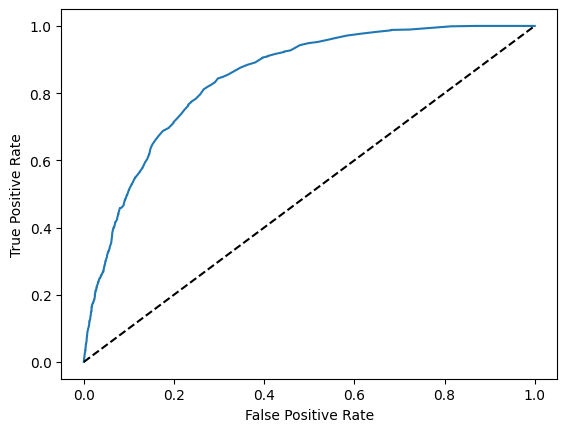

0.8452537206996968
0.5869134170522141
[[1931  231]
 [ 394  444]]


In [61]:
# Fit to the training data/RandomForestClassifier
clc.fit(X_train, y_train)

# Compute accuracy
print(clc.score(X_test, y_test))
y_pred_random = clc.predict(X_test)
print(precision_score(y_test, y_pred_random))
print(recall_score(y_test, y_pred_random))
y_pred_prob_random = clc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_random))
print(f1_score(y_test, y_pred_random))
print(confusion_matrix(y_test, y_pred_random))

0.7783333333333333
0.6196403872752421
0.5346062052505967


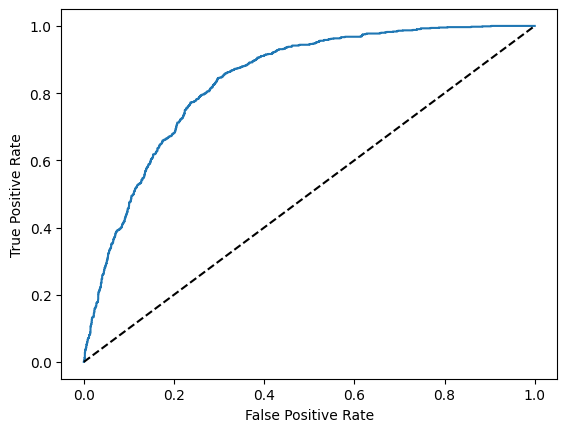

0.8375391057073911
0.5739910313901345
[[1887  275]
 [ 390  448]]


In [26]:
# Fit to the training data/LogisticRegression
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))
y_pred_logistic = clf.predict(X_test)
print(precision_score(y_test, y_pred_logistic))
print(recall_score(y_test, y_pred_logistic))
y_pred_prob_logistic = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logistic)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_logistic))
print(f1_score(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

0.732
0.5191441441441441
0.5501193317422435


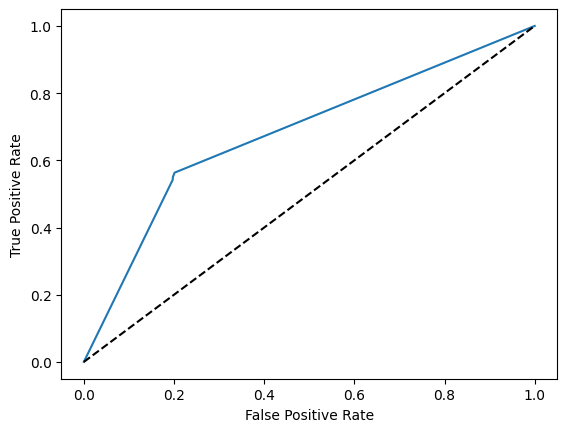

0.6800454917770384
0.5341830822711472
[[1735  427]
 [ 377  461]]


In [115]:
# Fit to the training data/DecisionTreeClassifier
cld.fit(X_train, y_train)

# Compute accuracy
print(cld.score(X_test, y_test))
y_pred_decision = cld.predict(X_test)
print(precision_score(y_test, y_pred_decision))
print(recall_score(y_test, y_pred_decision))
y_pred_prob_decision = cld.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_decision)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_decision))
print(f1_score(y_test, y_pred_decision))
print(confusion_matrix(y_test, y_pred_decision))

0.791
0.6435374149659864
0.5644391408114559


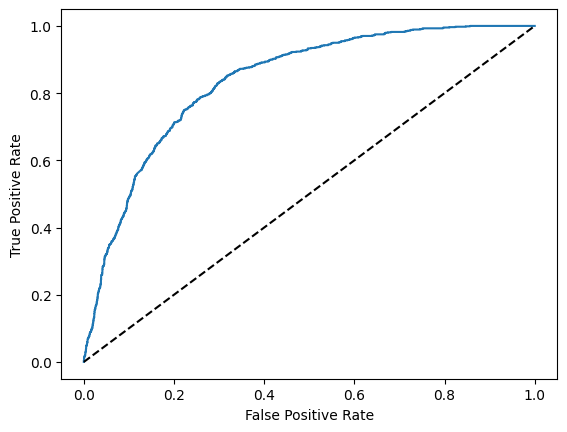

0.8357767271089485
0.6013986013986014
[[1900  262]
 [ 365  473]]


In [116]:
# Fit to the training data/SVC
svc.fit(X_train, y_train)

# Compute accuracy
print(svc.score(X_test, y_test))
y_pred_svc =svc.predict(X_test)
print(precision_score(y_test, y_pred_svc))
print(recall_score(y_test, y_pred_svc))
y_pred_prob_svc = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svc)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_svc))
print(f1_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

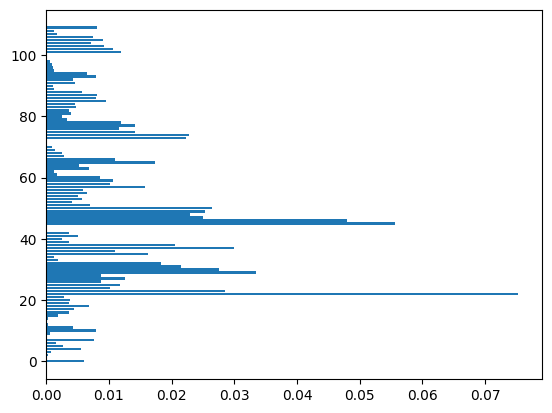

In [123]:
# Calculate feature importances/randomforestclassifier
importances = clc.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

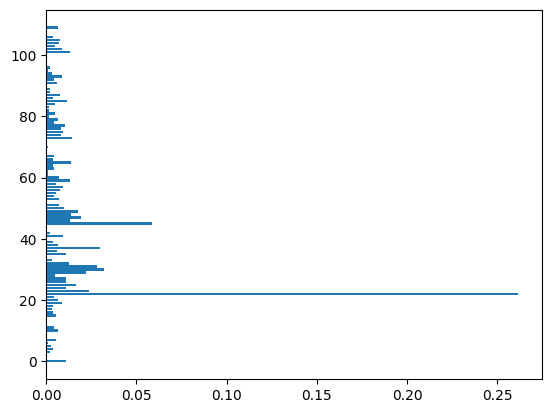

In [125]:
# Calculate feature importances/decision
importances = cld.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

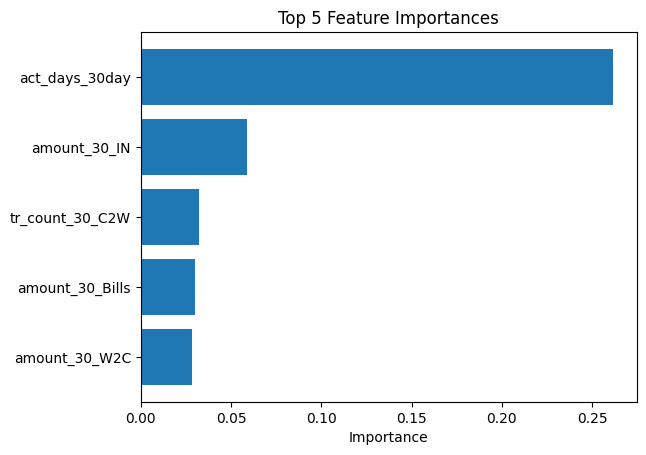

In [136]:
sorted_index = np.argsort(importances)


top_10_importances = importances[sorted_index][-5:]
top_10_labels = X.columns[sorted_index][-5:]

# Clear current plot
plt.clf()


plt.barh(range(len(top_10_importances)), top_10_importances, tick_label=top_10_labels)
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()